# Write a code that acquires daily price data for a minimum of two years  for at least the top 25 cryptos in terms of market cap that can be found here: : https://www.cryptocompare.com/coins/list/all/USD/1?sort=5&order=des

In [76]:
import cryptocompare as cryptos
import pandas as pd
import numpy as np
from itertools import product
from scipy.stats import t
import pickle
import os
from dotenv import load_dotenv
import requests

%matplotlib inline
CRYPTOCOMPARE_API_KEY='coincompare api'
# Load environment variables
load_dotenv()
API_KEY = os.getenv("coincompare api")
print(API_KEY)


None


In [ ]:
import requests

def get_top_crypto(limit=25):
    url = "https://min-api.cryptocompare.com/data/top/mktcapfull?limit=25&tsym=USD"
    headers = {"authorization": f"Apikey {API_KEY}"}

    response = requests.get(url, headers=headers)


    # Print raw response to debug
    print("Status Code:", response.status_code)
    print("Raw Response:", response.text) 

    # Check if response is empty
    if not response.text.strip():
        print("Error: Empty response from API!")
        return []

    # Check if response is valid JSON
    try:
        data = response.json()
    except requests.exceptions.JSONDecodeError:
        print("Error: Response is not valid JSON!")
        return []

    # Check if API returned expected data
    if "Data" not in data:
        print("Error: Unexpected response format!")
        return []


    top_cryptos = [coin["CoinInfo"]["Name"] for coin in data["Data"]]
    return top_cryptos

# Call function and check output
top_cryptos = get_top_crypto()
print("Top Cryptos:", top_cryptos)
    
    # Fetch top 25 cryptos
top_cryptos = get_top_crypto()

top_cryptos = get_top_crypto()
print(top_cryptos)

    

    

Status Code: 200
Raw Response: {"Message":"Success","Type":100,"MetaData":{"Count":1179},"SponsoredData":[],"Data":[{"CoinInfo":{"Id":"1182","Name":"BTC","FullName":"Bitcoin","Internal":"BTC","ImageUrl":"/media/37746251/btc.png","Url":"/coins/btc/overview","Algorithm":"SHA-256","ProofType":"PoW","Rating":{"Weiss":{"Rating":"B+","TechnologyAdoptionRating":"A-","MarketPerformanceRating":"D"}},"NetHashesPerSecond":814558805356262600000,"BlockNumber":886558,"BlockTime":676,"BlockReward":3.125,"AssetLaunchDate":"2009-01-03","MaxSupply":20999999.9769,"Type":1,"DocumentType":"Webpagecoinp"},"RAW":{"USD":{"TYPE":"5","MARKET":"CCCAGG","FROMSYMBOL":"BTC","TOSYMBOL":"USD","FLAGS":"2","LASTMARKET":"CCCAGG","MEDIAN":91337.794549579,"TOPTIERVOLUME24HOUR":38616.71626414,"TOPTIERVOLUME24HOURTO":3475087951.42766,"LASTTRADEID":"686032123","PRICE":91337.794549579,"LASTUPDATE":1741260950,"LASTVOLUME":0.00008919,"LASTVOLUMETO":8.14599027,"VOLUMEHOUR":429.33345261,"VOLUMEHOURTO":39198344.4263175,"OPENHOUR":

In [ ]:
# Get historical daily prices for past 2 years
def get_historical_prices(crypto_list):
    historical_data = {}

    for crypto in crypto_list:
        hist_prices = cryptocompare.get_historical_price_day(crypto, currency="USD", limit=730) 
        if hist_prices:
            historical_data[crypto] = hist_prices
    
    return historical_data


# Get historical data
historical_prices = get_historical_prices(top_cryptos)

# Convert to DataFrame
df = {crypto: pd.DataFrame(data) for crypto, data in historical_prices.items()}

# Display example for one cryptocurrency
df["BTC"].head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
0,1678060800,22595.33,22311.67,22434.09,27089.91,6.075852e+08,22410.79,direct,
1,1678147200,22540.85,21951.39,22410.79,38893.98,8.650834e+08,22201.44,direct,
2,1678233600,22262.91,21628.01,22201.44,41232.56,9.073546e+08,21704.74,direct,
3,1678320000,21822.92,20113.96,21704.74,75232.11,1.584852e+09,20370.48,direct,
4,1678406400,20371.25,19599.47,20370.48,105350.02,2.103890e+09,20206.71,direct,


# For the K cryptos in 

# a. randomly choose a date from the last year in your dataset and randomly choose N (≤ K) cryptos on this date;

# b. use 1/N weights and calculate the corresponding portfolio return, portfolio volatility, and Sharpe ratio for a holding period of up to six calendar months;

# c. repeat a.) and b.) 10,000 times and provide descriptive statistics for the resulting portfolio return, portfolio volatility, and Sharpe ratio for the number of cryptos N = 1, 2, …, K.

# d. Plot the average portfolio volatility against the number of cryptos N in the portfolio.

Running simulation 1/10000...
Running simulation 2/10000...
Running simulation 3/10000...
Running simulation 4/10000...
Error: 548
Running simulation 5/10000...
Error: 577
Running simulation 6/10000...
Error: 502
Running simulation 7/10000...
Running simulation 8/10000...
Error: 474
Running simulation 9/10000...
Running simulation 10/10000...
Error: 497
Running simulation 11/10000...
Running simulation 12/10000...
Error: 656
Running simulation 13/10000...
Running simulation 14/10000...
Error: 638
Running simulation 15/10000...
Running simulation 16/10000...
Running simulation 17/10000...
Running simulation 18/10000...
Error: 442
Running simulation 19/10000...
Error: 657
Running simulation 20/10000...
Running simulation 21/10000...
Running simulation 22/10000...
Running simulation 23/10000...
Error: 496
Running simulation 24/10000...
Running simulation 25/10000...
Error: 411
Running simulation 26/10000...
Error: 592
Running simulation 27/10000...
Running simulation 28/10000...
Error: 37

Text(0.5, 1.0, 'Does More Cryptos Reduce Risk?')

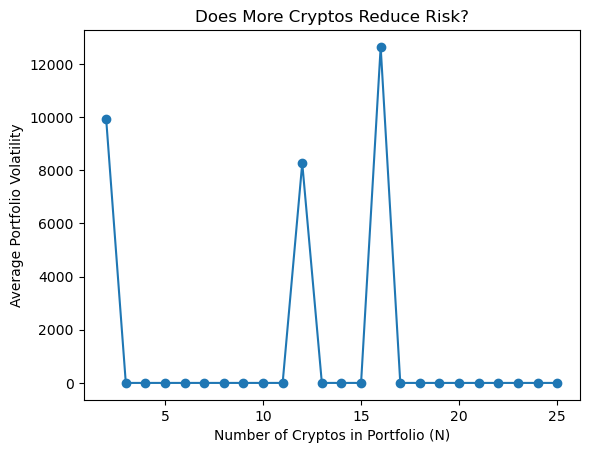

In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Store results
results = []

# Run 1,000 simulations
for i in range(10000):
    print(f"Running simulation {i+1}/10000...")  

    # Pick a random crypto and a random date 
    random_crypto = random.choice(list(df.keys()))  
    random_date = random.choice(df[random_crypto].index[-365:])  

    #Pick a random number of cryptos (1 to 25)
    N = random.randint(1, min(25, len(df))) 

    # Randomly select N cryptos
    selected_cryptos = random.sample(list(df.keys()), N) 

    # Calculate portfolio return
    try:
        crypto_returns = pd.concat([df[crypto]["close"].pct_change() for crypto in selected_cryptos], axis=1).dropna()
        port_return = crypto_returns.loc[random_date].mean()
        port_volatility = crypto_returns.loc[random_date].std()
    except KeyError as e:
        print(f"Error: {e}") 
        continue 

    # Store results
    results.append([N, port_return, port_volatility])

# Convert results into the data frame
simulation_df = pd.DataFrame(results, columns=["N", "Return", "Volatility"])

# Plot the results
avg_volatility = simulation_df.groupby("N")["Volatility"].mean()
plt.plot(avg_volatility.index, avg_volatility.values, marker="o")
plt.xlabel("Number of Cryptos in Portfolio (N)")
plt.ylabel("Average Portfolio Volatility")
plt.title("Does More Cryptos Reduce Risk?")



# 2. Interpret the plot from 1. Can you relate the insights from DeMiguel et. al.(2009) to your findings from the plot?

in the graph i see that there is kind of a general trend when it comes to volatility with a slight increase in some ranges, where it spikes. From DeMiguel et. al.(2009) we know that crypto portfolios volatility usually loweres with diversity. Therefore we can confirm that the reason for the lowere trend can be explained from this principal in the paper. 
Another thing DeMiguel argues is that after a certain point of assets in ones portfolio, the diversification will not be as effective anymore.This i something that could explain the spikes happening between 11-17 numbers of crypto in ones portfolio.  